In [1]:
import wordgraph as wg
import pandas as pd
from ggplot import * 
import numpy as np
import matplotlib.pyplot as plt
import powerlaw 
import os

G = wg.WordGraph()

In [4]:
def fit_powerlaws_to_graphs(data_dir, dataset):
    df = pd.DataFrame(columns=['dataset', 'epsilon', 'alpha', 'sigma', 
                               'pl_vs_exp_R', 'pl_vs_exp_p', 
                               'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if not file.startswith("."):
                G = wg.WordGraph()
                G.load_pickle(os.path.join(root, file))
                pl_result = G.fit_power_law()
                
                R1, p1 = pl_result.distribution_compare('power_law', 
                                                        "exponential")
                R2, p2 = pl_result.distribution_compare('power_law', 
                                                        "truncated_power_law")
                
                row = pd.DataFrame([[dataset, G.epsilon, pl_result.alpha, 
                                     pl_result.sigma, R1, p1, R2, p2]], 
                                   columns=['dataset','epsilon', 'alpha', 'sigma', 
                                            'pl_vs_exp_R', 'pl_vs_exp_p', 
                                            'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
                df = df.append(row, ignore_index=True)
    return df

## Fit all the corpora

In [5]:
%%capture
seed_all = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/seedlings_all_no_CHI', 'seedlings_all')
seed_6mo = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/seedlings_6mo_no_CHI', 'seedlings_6mo')
seed_1617mo = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/seedlings_1617mo_no_CHI', 'seedlings_1617mo')
wordbank = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/wordbank', 'wordbank')

data = pd.concat([seed_all, seed_6mo, seed_1617mo, wordbank])
data.to_csv('output/powerlaw_fits.csv', index=False)

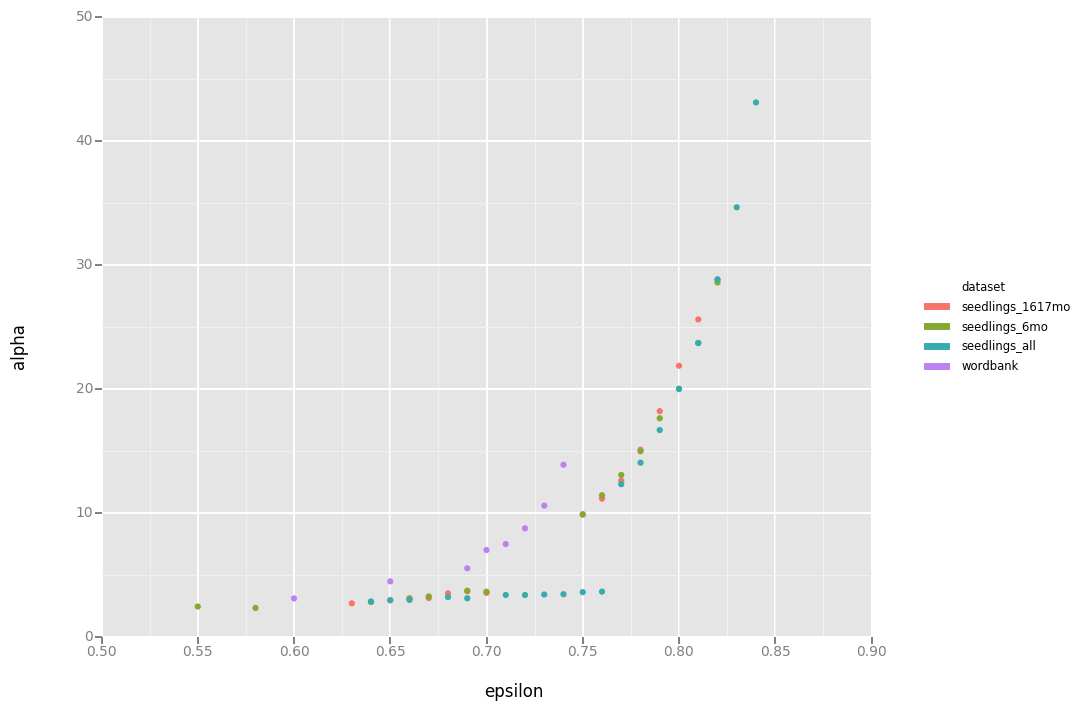

<ggplot: (286081800)>

In [66]:
data = pd.read_csv('output/powerlaw_fits.csv').query('(sigma < 0.7) & (pl_vs_exp_R >= 20)')
ggplot(data, aes(x='epsilon', y='alpha', color='dataset'))+\
    geom_point()

In [64]:
data

,dataset,epsilon,alpha,sigma,pl_vs_exp_R,pl_vs_exp_p,pl_vs_truncpl_R,pl_vs_truncpl_p
64,seedlings_all,0.64,2.854764,0.090075,27.691327,1.116044e-03,-3.166649e+00,0.011849
65,seedlings_all,0.65,2.958682,0.103089,26.188833,5.776612e-04,-1.785552e+00,0.058793
66,seedlings_all,0.66,2.987620,0.076334,134.559540,3.273651e-21,3.598385e-07,0.999323
68,seedlings_all,0.68,3.219449,0.099059,115.788946,2.250427e-21,1.391258e-06,0.998669
69,seedlings_all,0.69,3.123823,0.135686,30.829388,2.558059e-06,-7.682969e-02,0.695063
72,seedlings_all,0.72,3.386634,0.149457,58.073820,8.572920e-13,4.267631e-08,0.999767
155,seedlings_6mo,0.55,2.458917,0.070768,20.695204,3.777012e-02,-3.350822e-01,0.412994
158,seedlings_6mo,0.58,2.341360,0.056332,60.829648,2.769614e-05,-8.353342e+00,0.000044
164,seedlings_6mo,0.64,2.839314,0.090180,73.658584,4.981961e-10,-1.477236e-01,0.586751
166,seedlings_6mo,0.66,3.080974,0.116330,56.864941,5.061403e-10,2.635323e-07,0.999421


In [31]:
corrs = pd.read_csv('output/wordlearning.csv').query('(epsilon >= 0.6) & (epsilon <= 0.7)')

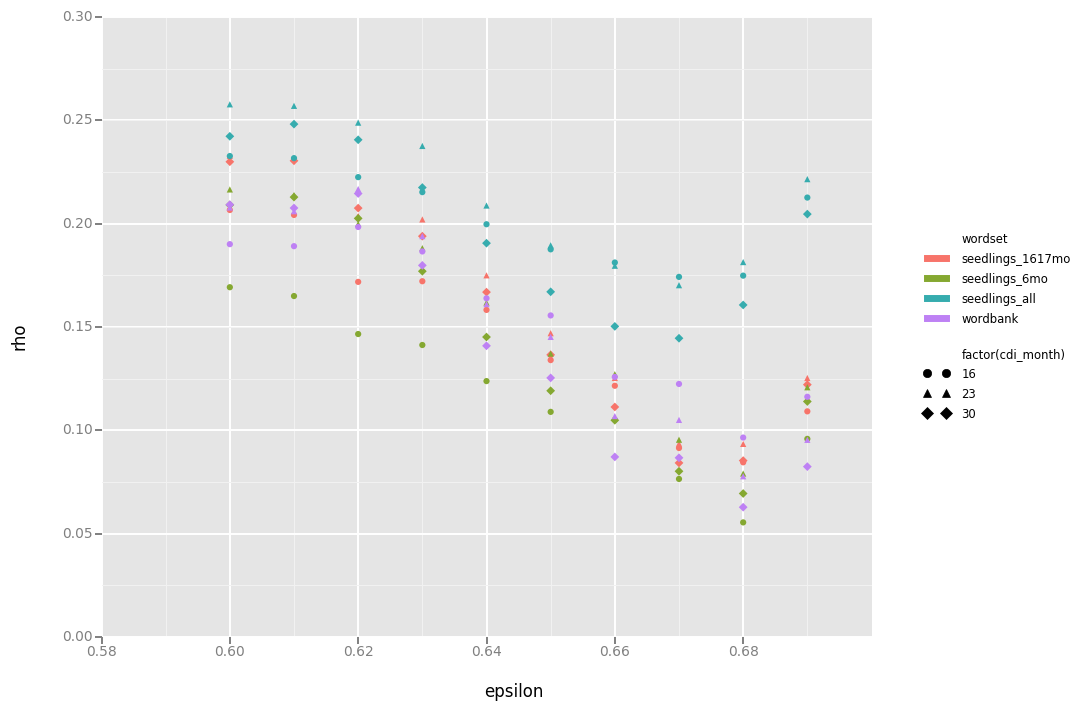

<ggplot: (282091910)>

In [43]:
ggplot(corrs, aes(x='epsilon', y='rho', color='wordset', shape='factor(cdi_month)'))+\
    geom_point()

In [2]:
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all_no_CHI/cos_0.13')

In [4]:
fit = G.fit_power_law()

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [5]:
fit.xmin

2360.0

In [7]:
fit.distribution_compare('power_law', 'lognormal')

/usr/local/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-2.6473093334797655, 0.1158757654049633)